# Exercise 9: AUC and ensemble methods with Python

**Objective**:  
The goal of this exercise is to understand:
1. How ensemble methods like **bagging** and **boosting** improve classifier performance.
2. The use of the **receiver operating characteristic (ROC)** to evaluate the performance of two-class classifiers.
3. How **artificial neural networks (ANNs)** and logistic regression can be generalized for multiclass classification.

**Key Concepts**:
- **Bagging (Bootstrap Aggregation)**: This method creates multiple bootstrapped training sets and averages their outputs to enhance model robustness, especially for non-linear classifiers.
- **Boosting (e.g., AdaBoost)**: This method focuses on improving classifier performance by giving more weight to misclassified examples and combining weak learners into a strong classifier.
- **ROC Curve and AUC**: ROC curves illustrate the tradeoff between the true positive rate and false positive rate for different thresholds, with the AUC quantifying overall performance.

**Setup**:
- Use Python scripts provided (e.g., `ex9_1_1.py` and `ex9_2_1.py`).
- Ensure the `dtuimldmtools` package is installed and properly set up.

#### Sections:
1. **9.1 Ensemble Methods**:
   - Use bagging and boosting on synthetic datasets and observe how they influence model performance and decision boundaries.
   - Evaluate the benefits and limitations of using these methods with logistic regression and decision trees.

2. **9.2 Receiver Operating Characteristic (ROC)**:
   - Train classifiers on the wine dataset and plot the ROC curve to evaluate performance, using metrics like AUC.
   - Analyze the effectiveness of different attributes (e.g., "Alcohol") in predicting wine type.

This exercise provides a practical understanding of ensemble methods and ROC analysis, emphasizing the strengths and weaknesses of different classification techniques.

### Exercise 9.1.1: Bagging with Logistic Regression

**Task Description**:  
In this exercise, we apply **bagging (Bootstrap Aggregation)** to improve the performance of a **logistic regression** model on a synthetic dataset. The steps include:

1. **Data Generation**: Create a synthetic dataset that might be challenging for a simple logistic regression model.
2. **Bagging Implementation**: Use bagging to train multiple logistic regression models on bootstrapped subsets of the data.
3. **Prediction and Evaluation**: Aggregate the predictions from these models to make final predictions and compare the performance with a single logistic regression model.

The purpose is to see how bagging reduces the variance of the model and improves overall classification accuracy.

Error rate: 17.40%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.80%
Error rate: 18.00%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.60%
Error rate: 17.20%
Error rate: 18.00%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.20%
Error rate: 18.00%
Error rate: 17.40%
Error rate: 18.00%
Error rate: 17.20%
Error rate: 18.00%
Error rate: 17.60%
Error rate: 17.20%
Error rate: 17.80%
Error rate: 17.20%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 18.80%
Error rate: 17.60%
Error rate: 18.00%
Error rate: 17.80%
Error rate: 17.60%
Error rate: 18.00%
Error rate: 17.60%
Error rate: 17.00%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.60%
Error rate: 18.00%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.20%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 

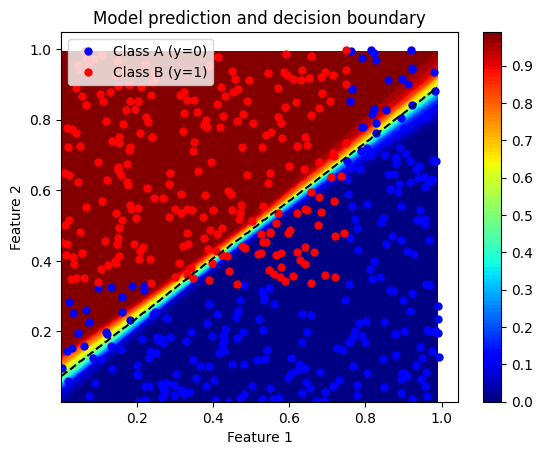

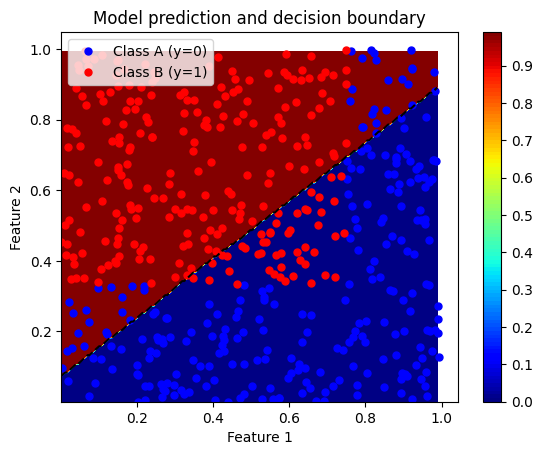

Ran Exercise 9.1.1


In [1]:
# exercise 9.1.1
import importlib_resources
from matplotlib.pyplot import figure, show
import numpy as np
from scipy.io import loadmat
from dtuimldmtools import BinClassifierEnsemble, bootstrap, dbplot, dbprobplot
from sklearn.linear_model import LogisticRegression

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth5.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Fit model using bootstrap aggregation (bagging):

# Number of rounds of bagging
L = 100

# Weights for selecting samples in each bootstrap
weights = np.ones((N,1),dtype=float)/N

# Storage of trained log.reg. classifiers fitted in each bootstrap
logits = [0]*L
votes = np.zeros((N,))

# For each round of bagging
for l in range(L):

    # Extract training set by random sampling with replacement from X and y
    X_train, y_train = bootstrap(X, y, N, weights)
    
    # Fit logistic regression model to training data and save result
    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)
    logits[l] = logit_classifier
    y_est = logit_classifier.predict(X).T
    votes = votes + y_est

    ErrorRate = (y!=y_est).sum(dtype=float)/N
    print('Error rate: {:2.2f}%'.format(ErrorRate*100))    
    
# Estimated value of class labels (using 0.5 as threshold) by majority voting
y_est_ensemble = votes>(L/2)

# Compute error rate
ErrorRate = (y!=y_est_ensemble).sum(dtype=float)/N
print('Error rate: {:3.2f}%'.format(ErrorRate*100))

ce = BinClassifierEnsemble(logits)
figure(1); dbprobplot(ce, X, y, 'auto', resolution=200)
figure(2); dbplot(ce, X, y, 'auto', resolution=200)

show()

print('Ran Exercise 9.1.1')

### Exercise 9.1.2: Boosting with Logistic Regression

**Task Description**:  
In this exercise, we apply **boosting**, specifically the **AdaBoost** algorithm, to improve the performance of a **logistic regression** model on a synthetic dataset. The steps include:

1. **Data Generation**: Use the same or similar synthetic dataset as in the previous exercise.
2. **Boosting Implementation**: Train multiple logistic regression models sequentially, each focusing on the errors made by the previous model.
3. **Evaluation**: Assess how boosting improves the model's performance compared to a single logistic regression model or the bagging approach from Exercise 9.1.1.

The goal is to understand how boosting can reduce both bias and variance, making the model more robust.

Let me know if you have the code for this task or if you need assistance implementing it!

Error rate: 17.80%
Error rate: 45.60%
Error rate: 51.67%
Error rate: 45.61%
Error rate: 52.61%
Error rate: 49.24%
Error rate: 50.34%
Error rate: 50.37%
Error rate: 46.53%
Error rate: 51.36%
Error rate: 51.40%
Error rate: 51.10%
Error rate: 51.56%
Error rate: 43.90%
Error rate: 48.25%
Error rate: 48.78%
Error rate: 51.17%
Error rate: 48.24%
Error rate: 56.09%
Error rate: 46.75%
Error rate: 44.79%
Error rate: 53.13%
Error rate: 51.64%
Error rate: 47.51%
Error rate: 56.86%
Error rate: 50.33%
Error rate: 47.93%
Error rate: 46.78%
Error rate: 46.18%
Error rate: 53.03%
Error rate: 52.48%
Error rate: 48.99%
Error rate: 47.74%
Error rate: 52.98%
Error rate: 46.89%
Error rate: 51.22%
Error rate: 51.06%
Error rate: 52.50%
Error rate: 48.17%
Error rate: 47.52%
Error rate: 49.14%
Error rate: 47.55%
Error rate: 51.69%
Error rate: 48.16%
Error rate: 49.88%
Error rate: 52.34%
Error rate: 46.93%
Error rate: 49.49%
Error rate: 50.76%
Error rate: 54.82%
Error rate: 44.20%
Error rate: 53.86%
Error rate: 

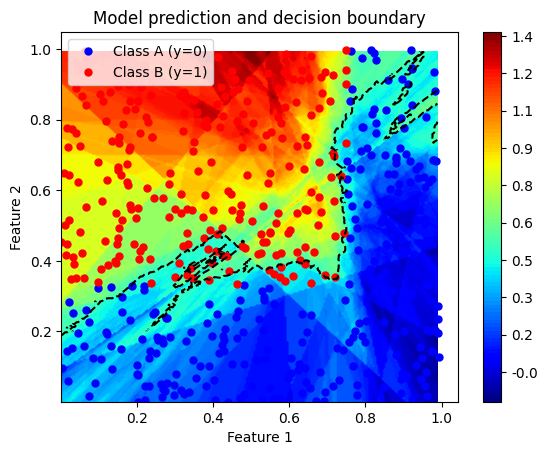

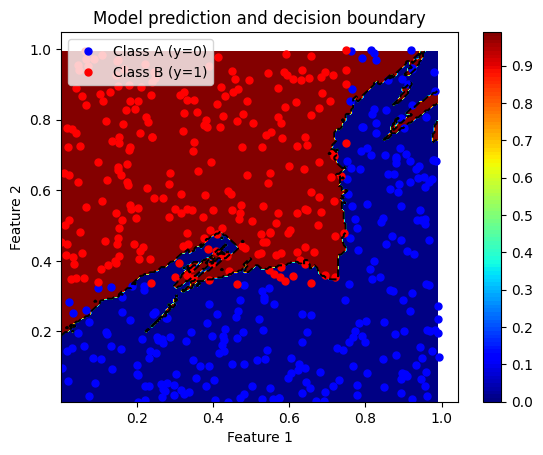

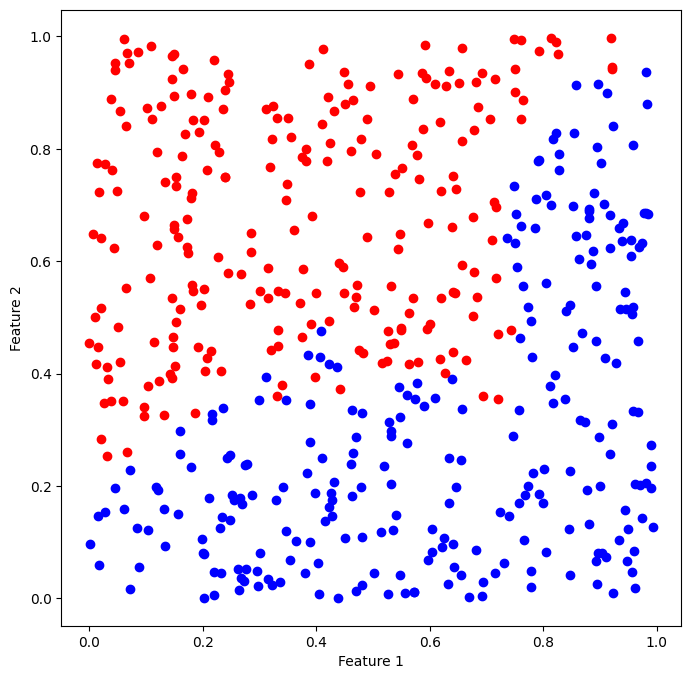

Ran Exercise 9.1.2


In [3]:
# exercise 9.1.2
import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from dtuimldmtools import BinClassifierEnsemble, bootstrap, dbplot, dbprobplot
from sklearn.linear_model import LogisticRegression

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth5.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Fit model using bootstrap aggregation (boosting, AdaBoost):

# Number of rounds of boosting
L = 500

# Weights for selecting samples in each bootstrap
weights = np.ones((N,),dtype=float)/N

# Storage of trained log.reg. classifiers fitted in each bootstrap
logits = [0]*L
alpha = np.ones( (L,) )
votes = np.zeros((N,1))
epsi = 0
y_all = np.zeros((N,L))
y = y > 0.5
# For each round of boosting
for l in range(L):
    
    # Extract training set by random sampling with replacement from X and y
    while True : 
        # not a thing of beauty, however log.reg. fails if presented with less than two classes. 
        X_train, y_train = bootstrap(X, y, N, weights) 
        if not (all(y_train==0) or all(y_train == 1)) : break      
    
    # Fit logistic regression model to training data and save result
    # turn off regularization with C. 
    logit_classifier = LogisticRegression(C=1000)

    logit_classifier.fit(X_train, y_train )
    logits[l] = logit_classifier
    y_est = logit_classifier.predict(X).T > 0.5
    
    y_all[:,l] = 1.0 * y_est
    v  = (y_est != y).T
    ErrorRate = np.multiply(weights,v).sum()
    epsi = ErrorRate
    
    alphai = 0.5 * np.log( (1-epsi)/epsi)
    
    weights[y_est == y] = weights[y_est == y] * np.exp( -alphai )
    weights[y_est != y] = weights[y_est != y] * np.exp(  alphai )
    
    weights = weights / sum(weights)
            
    votes = votes + y_est
    alpha[l] = alphai
    print('Error rate: {:2.2f}%'.format(ErrorRate*100))
    
    
# Estimated value of class labels (using 0.5 as threshold) by majority voting
alpha = alpha/sum(alpha)
y_est_ensemble = y_all @ alpha > 0.5

#y_est_ensemble = votes > (L/2)
#y_est_ensemble = mat(y_all) * mat(alpha) - (1-mat(y_all)) * mat(alpha) > 0
ErrorRateEnsemble = sum(y_est_ensemble != y)/N

# Compute error rate
#ErrorRate = (y!=y_est_ensemble).sum(dtype=float)/N
print('Error rate for ensemble classifier: {:.1f}%'.format(ErrorRateEnsemble*100))
 
ce = BinClassifierEnsemble(logits,alpha)
#ce = BinClassifierEnsemble(logits) # What happens if alpha is not included?
plt.figure(1); dbprobplot(ce, X, y, 'auto', resolution=200)
plt.figure(2); dbplot(ce, X, y, 'auto', resolution=200)
#plt.figure(3); plt.plot(alpha);

#%%
plt.figure(4,figsize=(8,8))
for i in range(2):
    plt.plot(X[ (y_est_ensemble==i),0],X[ (y_est_ensemble==i),1],'br'[i] + 'o')

## Incomment the below lines to investigate miss-classifications
#for i in range(2):
#    plt.plot(X[ (y==i),0],X[ (y==i),1],'br'[i] + '.')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')    
plt.show()

print('Ran Exercise 9.1.2')

### Exercise 9.1.3: Random Forests and Decision Trees

**Task Description**:  
In this exercise, we explore the limitations and strengths of decision trees and the improvements offered by using an ensemble method like **Random Forests**. Here’s what we will do:

1. **Data Exploration**: Load and visualize a synthetic dataset from *Data/synth7* to understand the challenges it presents for a decision tree classifier.
2. **Random Forest Implementation**: Train a random forest model using the `RandomForestClassifier` from `sklearn.ensemble` with **L = 100** bootstrap iterations and compare its performance to a single decision tree.
3. **Performance Evaluation**: Analyze the error rate on the training set and visualize the decision boundaries. Observe how reducing the number of bootstrap iterations affects the classification performance.

This exercise will help us understand why bagging improves decision tree performance and when Random Forests are useful.

Let me know if you're ready to provide or receive the code!

Error rate: 0.20%


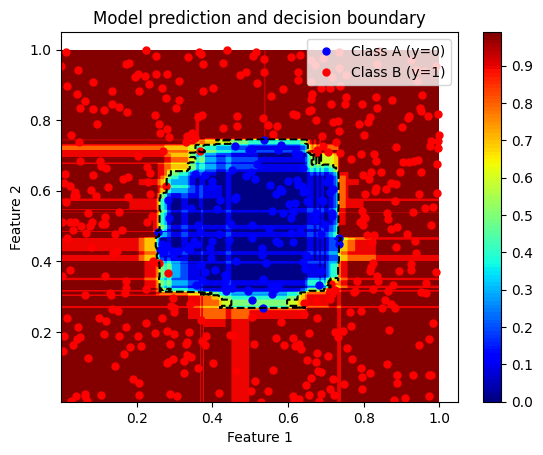

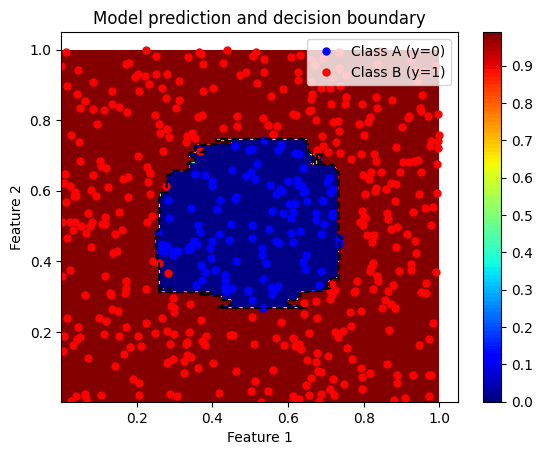

Ran Exercise 9.1.3


In [4]:
# exercise 9.1.3
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from dtuimldmtools import dbplot, dbprobplot
from sklearn.ensemble import RandomForestClassifier

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth7.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)


# Number of rounds of bagging
L = 10

# Fit model using random tree classifier:
rf_classifier = RandomForestClassifier(L)
rf_classifier.fit(X, y)
y_est = rf_classifier.predict(X).T
y_est_prob = rf_classifier.predict_proba(X).T

# Compute classification error
ErrorRate = (y!=y_est).sum(dtype=float)/N
print('Error rate: {:.2f}%'.format(ErrorRate*100))    

# Plot decision boundaries    
figure(1); dbprobplot(rf_classifier, X, y, 'auto', resolution=400)
figure(2); dbplot(rf_classifier, X, y, 'auto', resolution=400)

show()

print('Ran Exercise 9.1.3')

### Exercise 9.2: Receiver Operating Characteristic (ROC)

**Objective**:  
The aim of this exercise is to understand how to evaluate the performance of two-class classifiers using the **receiver operating characteristic (ROC)** and **area under the curve (AUC)**. We will implement and analyze these methods on the wine dataset to distinguish between red and white wines.

#### Key Points:
1. **ROC Curve**: A graphical representation that shows the trade-off between the true positive rate and the false positive rate for various threshold settings of a classifier.
2. **AUC**: The area under the ROC curve, which quantifies the overall performance of the classifier.
3. **Logistic Regression**: We will apply logistic regression to the wine dataset and use cross-validation to ensure robust evaluation.

#### Exercises:
1. **9.2.1**: Fit a logistic regression model to classify wines as red or white and evaluate using the ROC curve. Calculate the AUC and interpret the results.
2. **9.2.2**: Examine the impact of using only the "Alcohol" attribute for classification and compare the performance to using all available features.

This section provides a practical understanding of how ROC curves and AUC scores are used to assess classifier performance, especially in binary classification tasks.

#### Exercise 9.2.1
1. **Load the Data**: The script `ex9_2_1.py` loads the wine data and divides it into a training and test set, ensuring stratified sampling so that both sets have a similar class distribution.
2. **Fit Logistic Regression**: We fit a logistic regression model to classify wine as either red (positive) or white (negative).
3. **Plot the ROC Curve**: Use the provided `rocplot()` function from the course toolbox to visualize the ROC curve and calculate the AUC.
4. **Goal**: Understand how well the logistic regression model can separate the two classes and interpret the AUC score.

[   2    3    4 ... 6300 6301 6303]
[   0    1    5 ... 6297 6299 6302]


/Users/jonaswiendl/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jonaswiendl/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

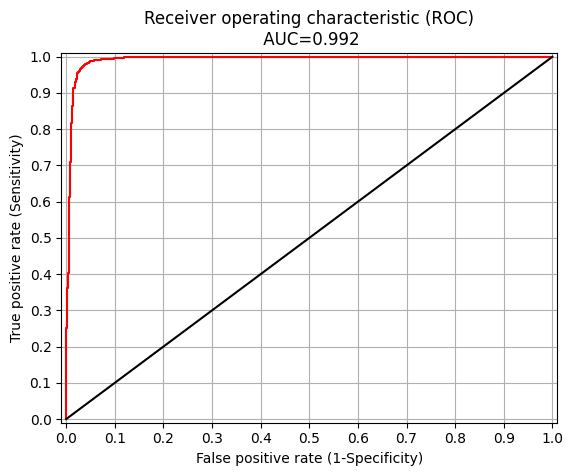

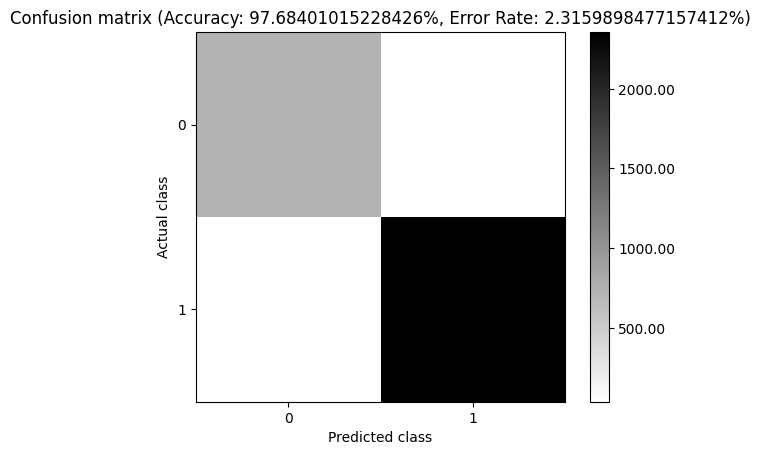

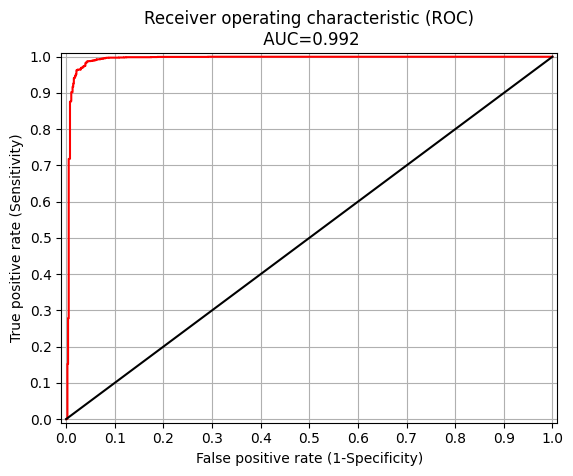

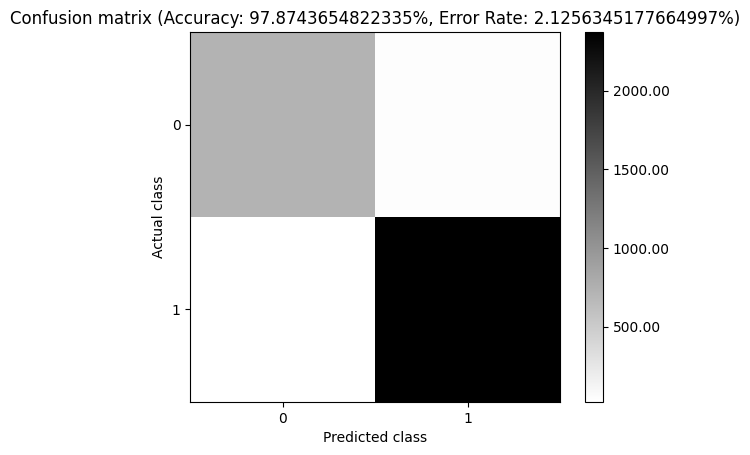

Ran Exercise 9.2.1


In [5]:
# exercise 9.2.1
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from dtuimldmtools import rocplot, confmatplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine2.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# K-fold crossvalidation with stratified folds
K = 2
CV = StratifiedKFold(K, shuffle=True)

k=0
for train_index, test_index in CV.split(X,y):
    print(train_index)
    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)

    y_test_est = logit_classifier.predict(X_test).T
    p = logit_classifier.predict_proba(X_test)[:,1].T

    figure(k)
    rocplot(p, y_test)

    figure(k+1)
    confmatplot(y_test,y_test_est)

    k+=2
    
show()    

print('Ran Exercise 9.2.1')

### Exercise 9.2.2: Impact of Using a Single Attribute

**Task Description**:  
In this exercise, we explore the impact of using only a single attribute, **"Alcohol"**, to classify wines compared to using all available features. The goal is to:

1. **Train a Logistic Regression Model**: Use only the "Alcohol" attribute to fit a logistic regression model.
2. **Compare Performance**: Plot the ROC curve and calculate the AUC to compare the performance of this simplified model against the model trained on all features from Exercise 9.2.1.
3. **Analysis**: Discuss whether using only the "Alcohol" attribute significantly impacts the classifier's ability to distinguish between red and white wines.

[   1    2    4 ... 6297 6299 6303]
[   0    3    6 ... 6300 6301 6302]


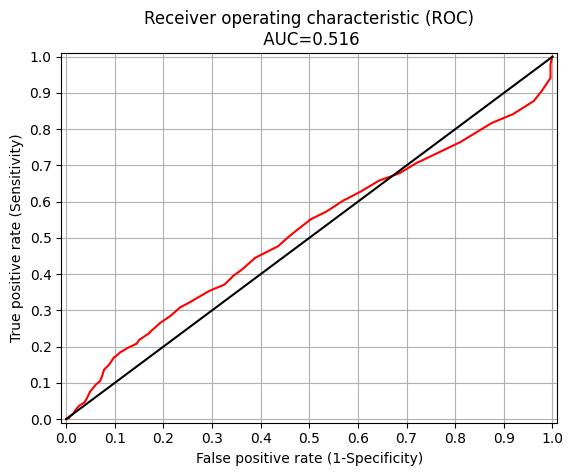

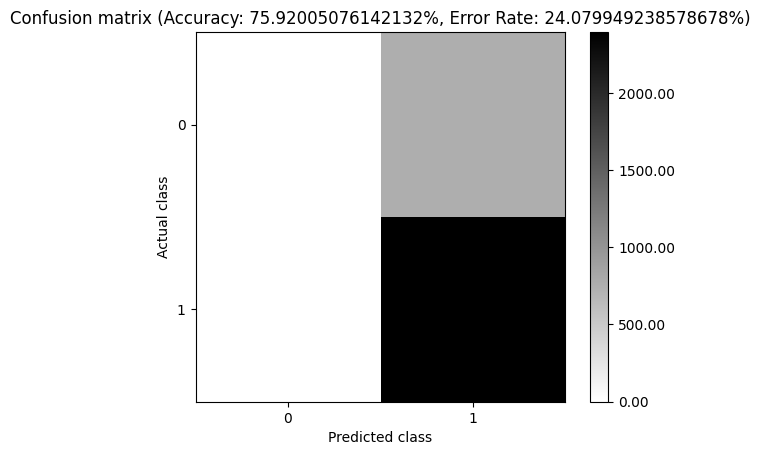

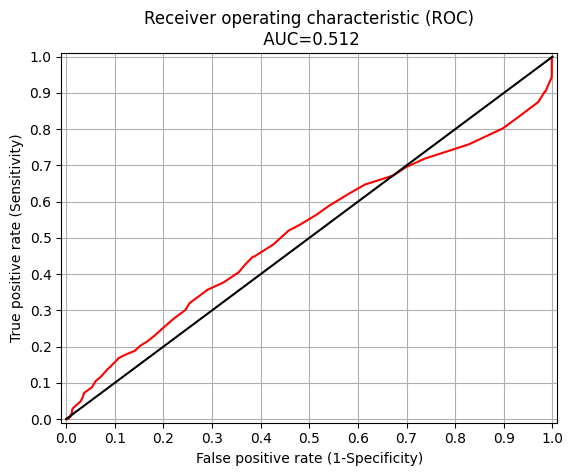

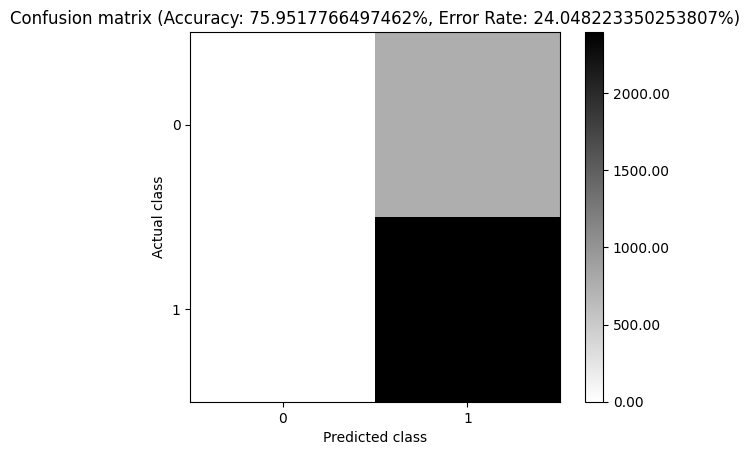

In [1]:
# exercise 9.2.2
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from dtuimldmtools import rocplot, confmatplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine2.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]

attribute_included = 10   # alcohol contents
X = X[:,attribute_included].reshape(-1,1)
attributeNames = attributeNames[attribute_included]
N, M = X.shape
C = len(classNames)

# K-fold crossvalidation
K = 2
CV = StratifiedKFold(K, shuffle=True)

k=0
for train_index, test_index in CV.split(X,y):
    print(train_index)
    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)

    y_test_est = logit_classifier.predict(X_test).T
    p = logit_classifier.predict_proba(X_test)[:,1].T

    figure(k)
    rocplot(p,y_test)

    figure(k+1)
    confmatplot(y_test,y_test_est)

    k+=2
    
show()    